In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
ft = 14
plt.rcParams.update({'font.size':ft})

In [31]:
class Species(object):
  
  def __init__(self, name='no name',antoine = pd.read_csv('https://raw.githubusercontent.com/amandalemette/images/main/ENG1818/Antoine.csv')):
    self.name = name
    self.antoine = antoine
  
  def antoine():
    return pd.read_csv('Antoine.csv')

  def params(self):
    idx = self.antoine[self.antoine['compoundname']== self.name].index[0]
    A = self.antoine.loc[idx]['A']
    B = self.antoine.loc[idx]['B']
    C = self.antoine.loc[idx]['C']
    Tmin = self.antoine.loc[idx]['Tmin']
    Tmax = self.antoine.loc[idx]['Tmax']
    return [A,B,C,Tmin,Tmax]

  def Psat(self,params,T):
    return 10**(params[0]-params[1]/(T+params[2]))

  def Tsat(self,params,P):
    return params[1]/(params[0]-np.log10(P))-params[2]

In [32]:
ac = Species('acetone')
et = Species('ethyl-alcohol')

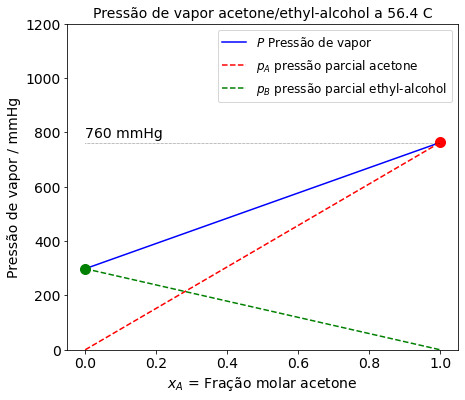

In [ ]:
#@title Lei de Raoult { run: "auto", vertical-output: true, form-width: "500px" }
#@markdown Defina aqui a temperatura do líquido.
T = 56.4 #@param {type:"slider", min:30, max:80, step:0.2}

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*ac.Psat(ac.params(),T)
pB = (1-xA)*et.Psat(et.params(),T)
Pv = pA + pB

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv,'b')
plt.plot(xA, pA,'r--')
plt.plot(xA, pB,'g--')

# mark pure component saturation pressures
plt.plot(0, et.Psat(et.params(),T), 'g.', ms=20)
plt.plot(1, ac.Psat(ac.params(),T), 'r.', ms=20)

# annotate the plot
plt.plot([0,1],[760,760],'k:', lw=0.5)
plt.text(0, 780, '760 mmHg')
plt.ylim(0, 1200)
plt.xlabel('$x_A$ = Fração molar ' + ac.name)
plt.ylabel('Pressão de vapor / mmHg')
#plt.title('Pressão de vapor '+ac.name+' / '+et.name+
#          ' a {:.1f} deg C'.format(T))
plt.title(f'Pressão de vapor {ac.name}/{et.name} a {np.round(T,2)} C',fontsize = 14)
plt.legend(['$P$ Pressão de vapor',
            '$p_A$ pressão parcial ' + ac.name,
            '$p_B$ pressão parcial ' + et.name],fontsize = 12)
plt.show()

# Exercícios

Resolva os itens a seguir.

1. Defina o que é ponto de ebulição. 

De acordo com a definição IUPAC, ponto de ebulição é a temperatura na qual a pressão de vapor do líquido iguala-se à pressão da atmosfera à qual encontra-se submetido. 

O ponto de ebulição da água é de 100º C
O ponto de ebulição ou temperatura de ebulição de uma substância é a temperatura em que ela passa do estado líquido para o estado gasoso.

2. Ajuste a temperatura no gráfico acima para determinar aproximadamente o ponto de ebulição da acetona pura. 


o valor é 56.4 C aproximadamente. 

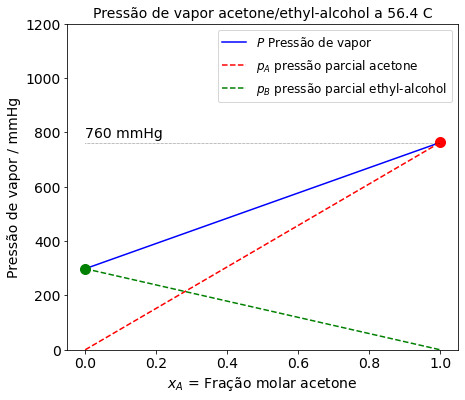

In [ ]:
#@title Lei de Raoult { run: "auto", vertical-output: true, form-width: "500px" }
#@markdown Defina aqui a temperatura do líquido.
T = 56.4 #@param {type:"slider", min:30, max:80, step:0.2}

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*ac.Psat(ac.params(),T)
pB = (1-xA)*et.Psat(et.params(),T)
Pv = pA + pB

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv,'b')
plt.plot(xA, pA,'r--')
plt.plot(xA, pB,'g--')

# mark pure component saturation pressures
plt.plot(0, et.Psat(et.params(),T), 'g.', ms=20)
plt.plot(1, ac.Psat(ac.params(),T), 'r.', ms=20)

# annotate the plot
plt.plot([0,1],[760,760],'k:', lw=0.5)
plt.text(0, 780, '760 mmHg')
plt.ylim(0, 1200)
plt.xlabel('$x_A$ = Fração molar ' + ac.name)
plt.ylabel('Pressão de vapor / mmHg')
#plt.title('Pressão de vapor '+ac.name+' / '+et.name+
#          ' a {:.1f} deg C'.format(T))
plt.title(f'Pressão de vapor {ac.name}/{et.name} a {np.round(T,2)} C',fontsize = 14)
plt.legend(['$P$ Pressão de vapor',
            '$p_A$ pressão parcial ' + ac.name,
            '$p_B$ pressão parcial ' + et.name],fontsize = 12)
plt.show()

3. Qual é o ponto de ebulição aproximado da mistura acetona/etanol quando a mistura contém 35 mol% de acetona? 


\begin{equation}
P = p_A + p_B
\end{equation}

A lei de Raoult, por sua vez, diz que para misturas ideais

\begin{align*}
p_A & = x_A P^{sat}_A(T) \\
p_B & = x_B P^{sat}_B(T)
\end{align*}

\begin{equation}
P = \underbrace{x_A P_A^{sat}(T)}_{p_A = y_AP} + \underbrace{x_B P_A^{sat}(T)}_{p_B = y_BP}
\end{equation}

\begin{equation}
P - x_A P_A^{sat}(T) - x_B P_A^{sat}(T) = 0
\end{equation}

$$
P^{sat}_A = 10^{A_A-\frac{B_A}{T +C_A}}
$$

$$
P^{sat}_B = 10^{A_B-\frac{B_B}{T +C_B}}
$$




In [ ]:
from scipy.optimize import fsolve

In [ ]:
def func(T,P,xA,ac,et):
  pA = xA*ac.Psat(ac.params(),T)
  pB = (1-xA)*et.Psat(et.params(),T)
  return P - pA - pB

In [ ]:
root = fsolve(func,40,args=(760,0.35,ac,et))

In [ ]:
root

array([69.71421731])

In [ ]:
print(f'O PE da mistura correspondente é {np.round(root[0],2)} C.')

O PE da mistura correspondente é 69.71 C.



4. Qual é a composição da fase vapor correspondente? 

$$
p_A = x_A P^{sat}_A(T) = y_AP
$$

$$
y_A = \frac{x_A P^{sat}_A(T)}{P}
$$

In [ ]:
xA = 0.35
Psat_A = ac.Psat(ac.params(),root[0])
yA = xA*Psat_A/760
yA

0.542489884844861

In [ ]:
yB = 1 - yA
yB

0.45751011515513895

In [ ]:
print(f'A composição na fase vapor é: {np.round(yA,2)} de acetona e {np.round(yB,2)} de etanol.')

A composição na fase vapor é: 0.54 de acetona e 0.46 de etanol.


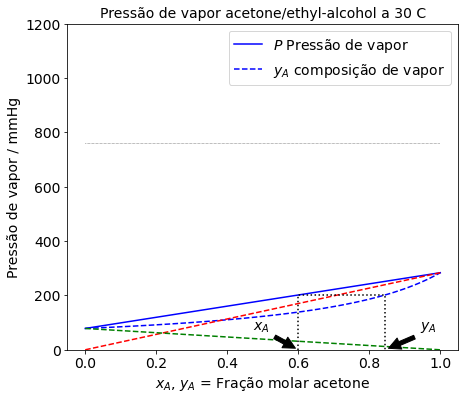

In [36]:
#@title Composição da fase vapor { run: "auto", vertical-output: true }
T = 30 #@param {type:"slider", min:30, max:80, step:1}
xA = 0.6 #@param {type:"slider", min:0, max:1, step:0.01}
show_partial_pressures = True #@param {type:"boolean"}
show_tie_line = True #@param {type:"boolean"}

xA_save = xA

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*ac.Psat(ac.params(),T)
pB = (1-xA)*et.Psat(et.params(),T)
Pv = pA + pB
yA = pA/Pv

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv, 'b')
plt.plot(yA, Pv, 'b--')
   
# annotate the plot
plt.plot([0,1], [760,760], 'k:', lw=0.5)
plt.ylim(0, 1200)
plt.xlabel('$x_A$, $y_A$ = Fração molar ' + ac.name)
plt.ylabel('Pressão de vapor / mmHg')
plt.title(f'Pressão de vapor {ac.name}/{et.name} a {np.round(T,2)} C',fontsize = 14)
plt.legend(['$P$ Pressão de vapor',
            '$y_A$ composição de vapor'])

if show_partial_pressures:
    plt.plot(xA, pA, 'r--')
    plt.plot(xA, pB, 'g--')

# show how to use
if show_tie_line:
    xA = xA_save
    pA = xA*ac.Psat(ac.params(),T)     # partial pressure A
    pB = (1-xA)*et.Psat(et.params(),T) # partial pressure B
    Pv = pA + pB          # vapor pressure
    yA = pA/Pv            # vapor phase composition            )
    plt.plot([xA, xA, yA, yA], [0, Pv, Pv, 0], 'k:')
    dx = -40 if xA < yA else 50
    plt.annotate('$x_A$', xy=(xA,0), xycoords='data',
             xytext=(dx-5,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))
    plt.annotate('$y_A$', xy=(yA,0), xycoords='data',
             xytext=(-dx-5,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

5. Você está em um armazém e se depara com um tanque lacrado rotulado com 60 % de acetona em etanol. Está 30 $^\circ$C no armazém. Qual é a pressão no tanque?

In [37]:
T = 30 

# compute partial pressures and total pressure
xA = 0.60
pA = xA*ac.Psat(ac.params(),T)
pB = (1-xA)*et.Psat(et.params(),T)
Pv = pA + pB
yA = pA/Pv
print(f'A pressão total no tanque corresponde a {np.round(Pv,2)} mmHg.')

A pressão total no tanque corresponde a 201.64 mmHg.


6. Suponha que você tenha uma mistura líquida de acetona/etanol com 50% molar de acetona. A uma pressão de 1 atm, a que temperatura a mistura entra em ebulição? Qual é a composição da fase de vapor?

In [38]:
from scipy.optimize import fsolve

In [39]:
def func(T,P,xA,ac,et):
  pA = xA*ac.Psat(ac.params(),T)
  pB = (1-xA)*et.Psat(et.params(),T)
  return P - pA - pB

In [40]:
root = fsolve(func,40,args=(760,0.50,ac,et))

In [42]:
print(f'PE da mistura nessas condições: {np.round(root[0],2)} C')

PE da mistura nessas condições: 66.29 C


In [43]:
pA = xA*ac.Psat(ac.params(),root[0])
pB = (1-xA)*et.Psat(et.params(),root[0])
Pv = pA + pB
yA = pA/Pv
yB = pB/Pv
print(f'Composisão do vapor: {np.round(yA,2)} para acetona e {np.round(yB,2)} para etanol.')

Composisão do vapor: 0.77 para acetona e 0.23 para etanol.


7. Um processo químico produz uma corrente de vapor de acetona/etanol com 50 mol% de acetona. Em qual temperatura a corrente começa a condensar considerando a pressão de 1 atm?  

Aqui se trata de encontrar a temperatura do ponto de orvalho.

$$
y_A = 0.5 = y_B
$$

$$
\frac{y_A}{P_A^{sat}} + \frac{y_B}{P_B^{sat}} - \frac{1}{P} = 0
$$

In [46]:
def func2(T,P,yA,ac,et):
  termo1 = yA/ac.Psat(ac.params(),T)
  termo2 = (1-yA)/et.Psat(et.params(),T)
  return 1/P - termo1 - termo2 

In [47]:
root = fsolve(func2,40,args=(760,0.50,ac,et))
print(f'A mistura começa a condensar a {np.round(root[0],2)} C')

A mistura começa a condensar a 70.56 C


8. Construa

a) Um diagrama xy a P constante

b) Um diagrama xy a T constante

para dois componentes presentes no [site](http://www.ddbst.com/en/EED/VLE/VLEindex.php) e compare os seus diagramas com os dados reportados no site. 